In [244]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score

In [246]:
df = pd.read_csv("Sample1.csv", encoding="latin1")

In [248]:
print(df.head())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156  08-11-2016  11-11-2016    Second Class    CG-12520   
1       2  CA-2016-152156  08-11-2016  11-11-2016    Second Class    CG-12520   
2       3  CA-2016-138688  12-06-2016  16-06-2016    Second Class    DV-13045   
3       4  US-2015-108966  11-10-2015  18-10-2015  Standard Class    SO-20335   
4       5  US-2015-108966  11-10-2015  18-10-2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

In [250]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [252]:
print(df.isnull().sum())

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [254]:
df.drop_duplicates(inplace = True)

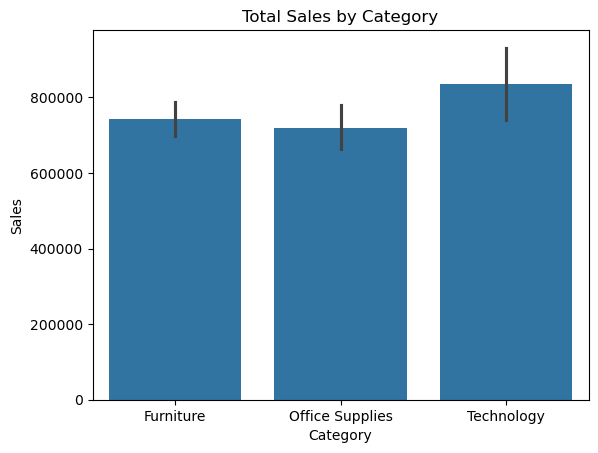

In [256]:
sns.barplot(x="Category", y="Sales", data=df, estimator=sum)
plt.title("Total Sales by Category")
plt.show()

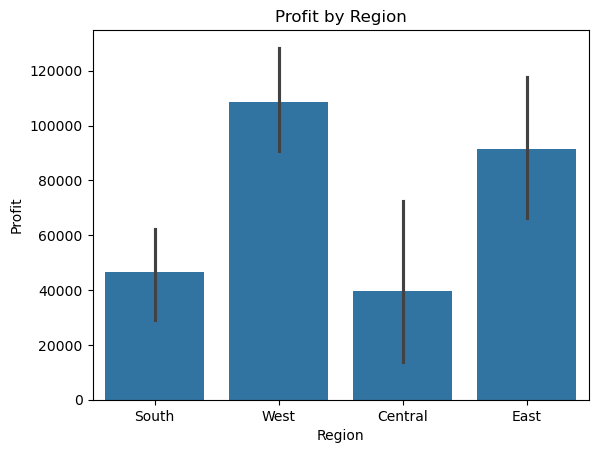

In [257]:
sns.barplot(x="Region", y="Profit", data=df, estimator=sum)
plt.title("Profit by Region")
plt.show()

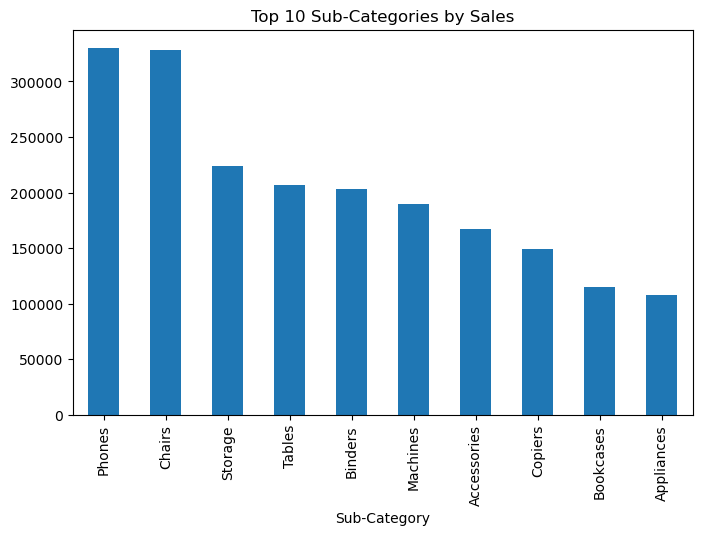

In [258]:
top_sub = df.groupby("Sub-Category")["Sales"].sum().sort_values(ascending=False).head(10)
top_sub.plot(kind="bar", figsize=(8,5))
plt.title("Top 10 Sub-Categories by Sales")
plt.show()


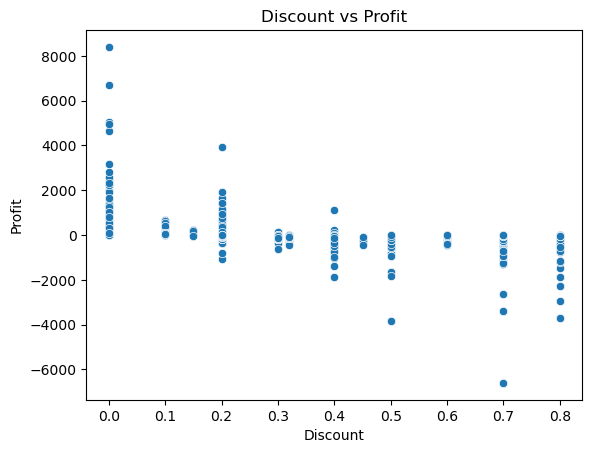

In [259]:
sns.scatterplot(x="Discount", y="Profit", data=df)
plt.title("Discount vs Profit")
plt.show()

In [260]:
le = LabelEncoder()
df["Category"] = le.fit_transform(df["Category"])

In [261]:
X = df[["Quantity", "Discount", "Category"]]
y = df["Sales"]

In [263]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), ['Category']),
        ('num', 'passthrough', ['Quantity', 'Discount'])
    ],
    remainder='drop'
)

In [264]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [265]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [266]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [267]:
y_pred = model.predict(X_test)

In [269]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Mean Squared Error: 568029.5968033744
R² Score: 0.03837751503632758


In [271]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [  52.80107511 -122.79260604   31.84215122]
Intercept: 14.82528201108235
